In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import math

## Step 1 - Reading Dataset

#Import dataset
bikes = pd.read_csv('hour.csv')
bikes

In [3]:
bikes.rename(columns={'instant':'index'},inplace=True)
bikes

,index,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


## Step 2 - Prelim analysis of data and drop obvious features

In [7]:
bikes.columns

Index(['index', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [36]:
bikes_prep = bikes.copy()
bikes_prep = bikes_prep.drop(['index','dteday','casual', 'registered'],axis=1)
bikes_prep.rename(columns = {'cnt':'demand','hum':'humidity','yr':'year','mnth':'Month','hr':'hour','weathersit':'weather'},inplace = True)
bikes_prep

,season,year,Month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,demand
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [54]:
#Check null or missing values
bikes_prep.isnull().sum()

season      0
Month       0
hour        0
holiday     0
weather     0
temp        0
humidity    0
demand      0
dtype: int64

## Step 3 - Visualize (Exploratory Data Analysis)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3A06F64C8>,
      dtype=object)

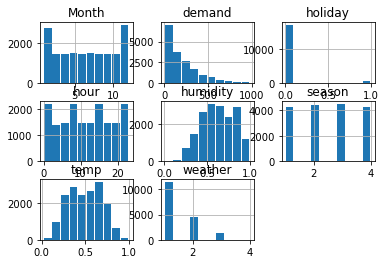

In [53]:
bikes_prep.hist(rwidth = 0.9)

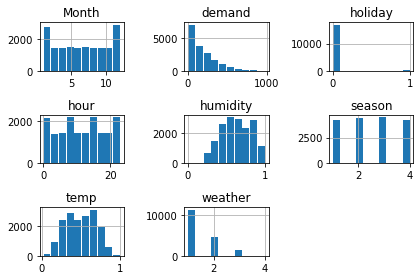

In [52]:
#To see the histograms clearly
bikes_prep.hist(rwidth = 0.9)
plt.tight_layout()

In [14]:
#Observation - demand is not normally distributed

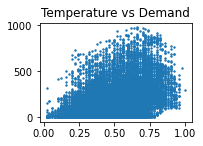

In [18]:
#Visualize continuous variables ('temp', 'atemp', 'hum', 'windspeed')
plt.subplot(2,2,1)
plt.title(label = 'Temperature vs Demand')
plt.scatter(bikes_prep['temp'],bikes_prep['demand'],s=2)

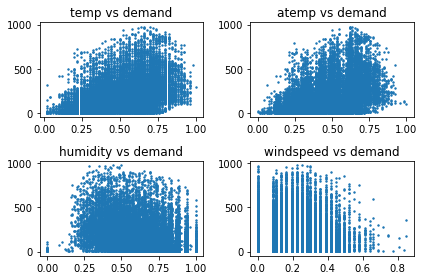

In [28]:
cont_var = ['temp', 'atemp', 'humidity', 'windspeed']
for i in range(4):
    plt.subplot(2,2,i+1)
    label = cont_var[i]+' vs '+'demand'
    plt.title(label)
    plt.scatter(bikes_prep[cont_var[i]],bikes_prep['demand'],s=2)
    plt.tight_layout()

In [31]:
cat_list = bikes_prep['season'].unique()
cat_list

array([1, 2, 3, 4], dtype=int64)

In [33]:
cat_average = bikes_prep.groupby('season').mean()['demand']
cat_average

season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: demand, dtype: float64

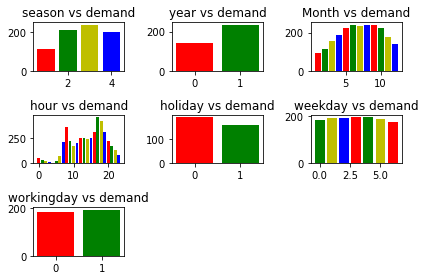

In [41]:
#Plotting all the categorical variables
cat_var = ['season', 'year', 'Month', 'hour', 'holiday', 'weekday', 'workingday','weather']
colors = ['r','g','y','b']
for i in range(7):
    plt.subplot(3,3,i+1)
    label = cat_var[i]+' vs '+'demand'
    plt.title(label)
    cat_list = bikes_prep[cat_var[i]].unique()
    cat_average = bikes_prep.groupby(cat_var[i]).mean()['demand']
    plt.bar(cat_list,cat_average,color = colors)
    plt.tight_layout()
# Important observations from the graphs: weekday doesn't matter (feature can be dropped), Fall season has the highest demand and spring lowest
# Non holiday has more demand, Year can be dropped (due to limited number of years)
# Working day can be dropped


In [37]:
bikes_prep.columns

Index(['season', 'year', 'Month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [44]:
# Check outliers
bikes_prep['demand'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: demand, dtype: float64

In [45]:
bikes_prep.demand.quantile([0.05,0.10,.15,0.9,0.95,0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: demand, dtype: float64

## Step 4 - Check Multiple Linear Regression Assumptions - Normality, Linear Correlation, Muti Collinearity, Autocorrelation, Sample Size

In [48]:
correlation = bikes_prep[['temp', 'atemp', 'humidity', 'windspeed', 'demand']].corr()
correlation
#You will notice temp and temp are highly correlated, atemp is derived from temp, so we can drop this
#windspeed and demand have less correlation, so drop it

,temp,atemp,humidity,windspeed,demand
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
demand,0.404772,0.400929,-0.322911,0.093234,1.000000


## Step 5 - Drop irrelevant features

In [49]:
#Features to be dropped
bikes_prep = bikes_prep.drop(['atemp', 'windspeed','weekday', 'workingday','year'],axis = 1)
bikes_prep.columns

Index(['season', 'Month', 'hour', 'holiday', 'weather', 'temp', 'humidity',
       'demand'],
      dtype='object')

(array([-12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
          1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12]),
 array([0.45474708, 0.4704955 , 0.49622798, 0.49404052, 0.4679593 ,
        0.47732034, 0.52675766, 0.59145737, 0.6520156 , 0.7151954 ,
        0.80591017, 0.92530966, 1.        , 0.92530966, 0.80591017,
        0.7151954 , 0.6520156 , 0.59145737, 0.52675766, 0.47732034,
        0.4679593 , 0.49404052, 0.49622798, 0.4704955 , 0.45474708],
       dtype=float32),
 <matplotlib.lines.Line2D at 0x1e3a0d2a9c8>)

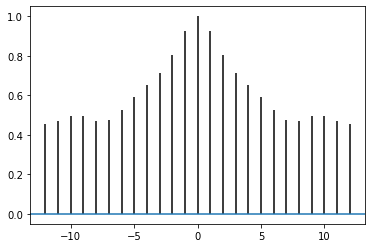

In [51]:
# Check auto correlation in demand
df1 = pd.to_numeric(bikes_prep['demand'],downcast='float')
plt.acorr(df1,maxlags = 12)

In [ ]:
# High auto correlation in demand

## Step 6 - Create/ Modify more features

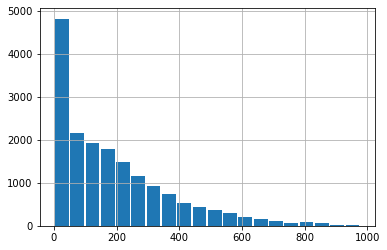

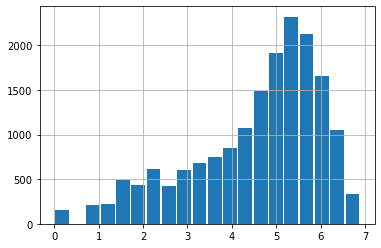

In [55]:
#Demand is distributde in log normal way
df1 = bikes_prep['demand']
df2 = np.log(df1)
plt.figure()
df1.hist(rwidth = 0.9,bins = 20)
plt.figure()
df2.hist(rwidth = 0.9,bins = 20)

In [56]:
bikes_prep['demand'] = np.log(bikes_prep['demand'])

In [58]:
#Solving autocorrelation problem
t_1 = bikes_prep['demand'].shift(+1).to_frame()
t_1.columns = ['t-1']
t_2 = bikes_prep['demand'].shift(+2).to_frame()
t_2.columns = ['t-2']
t_3 = bikes_prep['demand'].shift(+3).to_frame()
t_3.columns = ['t-3']
bikes_prep_lag = pd.concat([bikes_prep,t_1,t_2,t_3],axis = 1)
bikes_prep_lag

,season,Month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
0,1,1,0,0,1,0.24,0.81,2.772589,NaN,NaN,NaN
1,1,1,1,0,1,0.22,0.80,3.688879,2.772589,NaN,NaN
2,1,1,2,0,1,0.22,0.80,3.465736,3.688879,2.772589,NaN
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [60]:
bikes_prep_lag = bikes_prep_lag.dropna()
bikes_prep_lag

,season,Month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


## Step 7 - Create Dummy Variables

In [63]:
bikes_prep_lag.dtypes

season        int64
Month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
demand      float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [62]:
dummy_df = pd.get_dummies(bikes_prep_lag,drop_first = True)
dummy_df

,season,Month,hour,holiday,weather,temp,humidity,demand,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


In [66]:
# We need to change to type category to create dummy variables
change_col = ['season', 'Month', 'hour', 'holiday', 'weather']
for i in range(5):
    bikes_prep_lag[change_col[i]] = bikes_prep_lag[change_col[i]].astype('category') 
    
bikes_prep_lag.dtypes

season      category
Month       category
hour        category
holiday     category
weather     category
temp         float64
humidity     float64
demand       float64
t-1          float64
t-2          float64
t-3          float64
dtype: object

In [67]:
dummy_df = pd.get_dummies(bikes_prep_lag,drop_first = True)
dummy_df

,temp,humidity,demand,t-1,t-2,t-3,season_2,season_3,season_4,Month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Step 8 - Train Test split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X = bikes_prep_lag.drop(['demand'],axis=1)
y = bikes_prep_lag['demand']

In [71]:
tr_size = int(0.7*len(X))
tr_size

12163

In [72]:
X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]
y_train = y.values[0:tr_size]
y_test = y.values[tr_size:len(y)]

## Step 9 - Fit and score the model

In [73]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
r2_train = reg.score(X_train,y_train)
r2_test = reg.score(X_test,y_test)

In [76]:
r2_train

0.8620985028863707

In [77]:
r2_test

0.8886718544254076

In [74]:
# Create y predictions
y_predict = reg.predict(X_test)

In [78]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
rmse

0.47611857756057596

In [86]:
# Calculate RMSLE
y_test_e = []
y_predict_e = []
for i in range(0,len(y_test)):
    y_test_e.append(math.exp(y_test[i]))
    y_predict_e.append(math.exp(y_predict[i]))
    
#Calculate the sum
log_sq_sum = 0.0
for i in range(0,len(y_test)):
    log_a = math.log(y_test_e[i])+1
    log_p = math.log(y_predict_e[i])+1
    log_diff = (log_p - log_a)**2
    log_sq_sum = log_sq_sum + log_diff
    
rmsle = math.sqrt(log_sq_sum/len(y_test))
                  
print(rmsle)


0.47611857756057535


In [87]:
r2_test

0.8886718544254076

In [90]:
## Using Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
y_predict_rf = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_log_error
rmsle = np.sqrt(mean_squared_log_error(y_predict_rf,y_test))
rmsle

0.0887657730767495

## Step 10 - Present results